In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [43]:
file = 'Titanic Dataset.csv'

In [44]:
df = pd.read_csv('Titanic Dataset.csv')

In [45]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [46]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


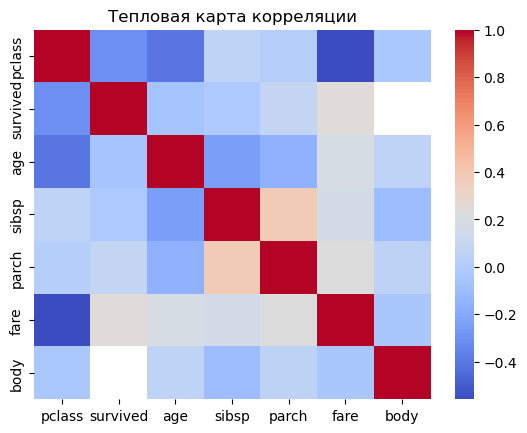

In [47]:
cols_for_corr = ['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare','body']
correlation_matrix = df[cols_for_corr].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции')
plt.show()

In [48]:
y = df['survived']

In [49]:
features = ['pclass', 'age', 'fare', 'sibsp','sex']
X = df[features]

In [50]:
X = pd.get_dummies(X, columns=['sex'], drop_first=True) #(1 = мужчина, 0 = женщина)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
imputer = SimpleImputer(strategy='median')
X_train_1 = imputer.fit_transform(X_train)
X_test_1 = imputer.transform(X_test)

In [53]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_1)
X_test_sc = scaler.transform(X_test_1)

In [54]:
model = LogisticRegression(random_state=42)
model.fit(X_train_sc, y_train)

LogisticRegression(random_state=42)

In [55]:
y_pred = model.predict(X_test_sc)
accuracy = accuracy_score(y_test, y_pred)

print(f" Accuracyy: {accuracy:.4f}")

 Accuracyy: 0.7672


In [56]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"(MSE): {mse:.4f}")

(MSE): 0.2328


In [57]:
true_pred = (y_test == y_pred)

In [58]:
sum_true_pred = np.sum(true_pred )
print(sum_true_pred)
all_= len(y_test)
accuracy_2 = sum_true_pred/ all_
print(f" Accuracy_2: {accuracy_2:.4f}")

201
 Accuracy_2: 0.7672


In [59]:
errors = y_test - y_pred
errors_sq = errors**2
mse_2 = np.mean(errors_sq)
print(f"(MSE_2): {mse_2:.4f}")

(MSE_2): 0.2328


In [60]:
from sklearn.metrics import log_loss
y_probs = model.predict_proba(X_test_sc) 

logloss_value = log_loss(y_test, y_probs)

print(f"Логарифмические потери: {logloss_value:.4f}")

Логарифмические потери: 0.4896
